In [3]:
import pandas as pd
from scipy.io import arff #arff 파일 형식 불러오기
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [4]:
# 파일 경로
arff_file_path = '/content/drive/MyDrive/mnist_784.arff'

# 파일 읽기
data = arff.loadarff(arff_file_path)
df = pd.DataFrame(data[0])  # DataFrame으로 변환

In [5]:
# 데이터 전처리
# 'class' 컬럼을 정수형으로 변환(신경망 학습에 사용하기 좋게)
labels = df['class'].astype(str).astype(int).values  # 클래스 레이블
images = df.drop('class', axis=1).values  # 이미지 픽셀 데이터만 남김

# 28x28 2차원 배열로 변환
images = images.reshape(-1, 28, 28)

# 픽셀값 255로 나누어 0~1 범위로 정규화
images = images.astype('float32') / 255

In [6]:
# 훈련용, 테스트용 분리 (MNIST 데이터에 따라 70000개를 60000,10000 분할)
train_images = images[:60000]
train_labels = labels[:60000]
test_images = images[60000:]
test_labels = labels[60000:]

In [7]:
# --CNN 모델--
# sequential로 레이어 순서대로 추가할 수 있도록 설정
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #1번째 컨볼루션 레이어, 3x3 필터 사용
cnn_model.add(layers.MaxPooling2D((2, 2)))  # 1번째 풀링 레이어, 2x2 필터 사용
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # 2번째 컨볼루션 레이어
cnn_model.add(layers.MaxPooling2D((2, 2)))  # 2번째 풀링 레이어
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # 3번째 컨볼루션 레이어
#2D 데이터 -> 1D 벡터(완전 연결 층에 입력)
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))  # 1번째 완전 연결 레이어
#출력층, 소프트맥스 사용: 확률 계산)
cnn_model.add(layers.Dense(10, activation='softmax'))

# 컴파일(최적화 알고리즘, 손실 함수, 평가 지표 설정)
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# 데이터 차원 변경
train_images_cnn = train_images.reshape(-1, 28, 28, 1)
test_images_cnn = test_images.reshape(-1, 28, 28, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# CNN 훈련
cnn_history = cnn_model.fit(train_images_cnn, train_labels, epochs=10, batch_size=64, validation_split=0.1)

# 모델 평가
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(test_images_cnn, test_labels)
print(f'Test accuracy (CNN): {test_acc_cnn:.4f}')


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 56s 64ms/step - accuracy: 0.8500 - loss: 0.4809 - val_accuracy: 0.9758 - val_loss: 0.0787
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 61ms/step - accuracy: 0.9816 - loss: 0.0608 - val_accuracy: 0.9865 - val_loss: 0.0422
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.9884 - loss: 0.0390 - val_accuracy: 0.9875 - val_loss: 0.0453
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 52s 62ms/step - accuracy: 0.9901 - loss: 0.0294 - val_accuracy: 0.9905 - val_loss: 0.0342
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.9931 - loss: 0.0225 - val_accuracy: 0.9923 - val_loss: 0.0304
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 51s 60ms/step - accuracy: 0.9932 - loss: 0.0207 - val_accuracy: 0.9913 - val_loss: 0.0335
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 58ms/step - accuracy: 0.9953 - loss: 0.0149 - val_accuracy: 0.9893 - val_loss: 0.0397
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.9958 - loss: 0.0130 - 

In [9]:
# CNN 정확도 로그 파일 저장
with open('cnn_accuracy_log.txt', 'w') as f:
    f.write(f'Test accuracy (CNN): {test_acc_cnn:.4f}\n')

In [10]:
# --FCN 모델--
fcn_model = models.Sequential()
fcn_model.add(layers.Flatten(input_shape=(28, 28)))  # 2D -> 1D 벡터
#ReLU 사용: 비선형성
fcn_model.add(layers.Dense(128, activation='relu'))  # 1번째 완전 연결 레이어
fcn_model.add(layers.Dense(64, activation='relu'))   # 2번째 완전 연결 레이어
#출력층, 소프트맥스 사용
fcn_model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# 컴파일(최적화 알고리즘, 손실 함수, 평가 지표)
fcn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# FCN 훈련
fcn_history = fcn_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

# 모델 평가
test_loss_fcn, test_acc_fcn = fcn_model.evaluate(test_images, test_labels)
print(f'Test accuracy (FCN): {test_acc_fcn:.4f}')

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8529 - loss: 0.5233 - val_accuracy: 0.9625 - val_loss: 0.1284
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9626 - loss: 0.1290 - val_accuracy: 0.9760 - val_loss: 0.0847
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9753 - loss: 0.0845 - val_accuracy: 0.9703 - val_loss: 0.1018
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9821 - loss: 0.0588 - val_accuracy: 0.9773 - val_loss: 0.0796
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9869 - loss: 0.0417 - val_accuracy: 0.9778 - val_loss: 0.0745
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9875 - loss: 0.0384 - val_accuracy: 0.9793 - val_loss: 0.0783
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9918 - loss: 0.0269 - val_accuracy: 0.9795 - val_loss: 0.0754
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9928 - loss: 0.0250 - val_accuracy: 0.

In [12]:
# FCN 정확도 로그 파일 저장
with open('fcn_accuracy_log.txt', 'w') as f:
    f.write(f'Test accuracy (FCN): {test_acc_fcn:.4f}\n')

In [18]:
# 한글 글꼴 설치
!apt-get -y install fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#글꼴 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


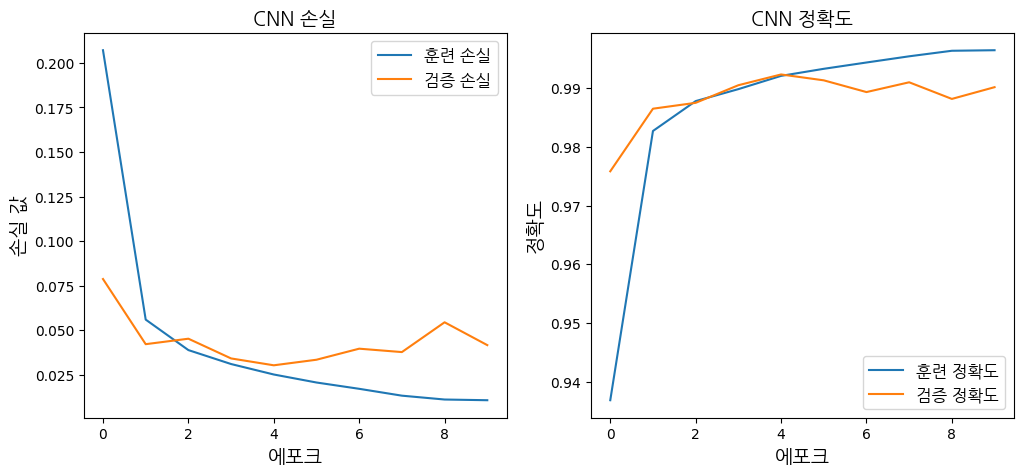

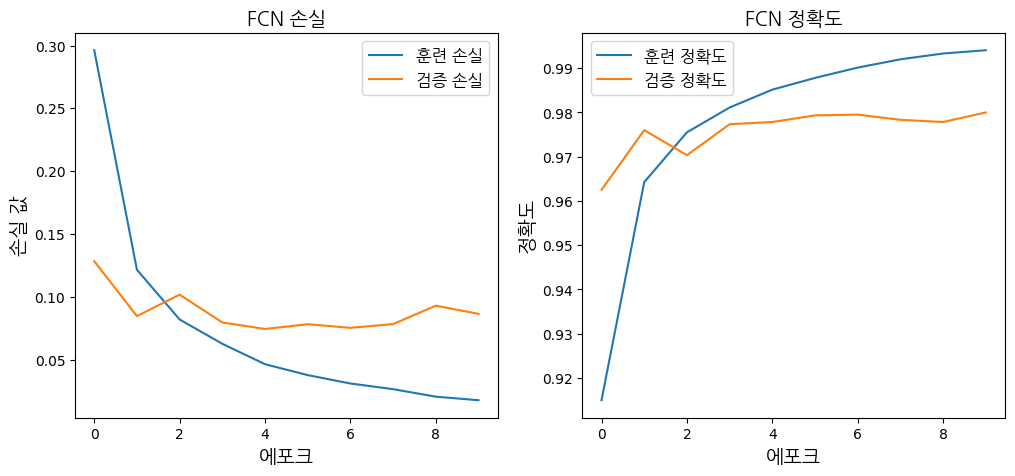

In [20]:
# 손실, 정확도 시각화 함수
def plot_history(history, model_type):
    plt.figure(figsize=(12, 5))

    # 손실 그래프
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='훈련 손실')
    plt.plot(history.history['val_loss'], label='검증 손실')
    plt.title(f'{model_type} 손실', fontproperties=fm.FontProperties(fname=font_path, size=14))  # 한글 폰트 적용
    plt.xlabel('에포크', fontproperties=fm.FontProperties(fname=font_path, size=14))  # 한글 폰트 적용
    plt.ylabel('손실 값', fontproperties=fm.FontProperties(fname=font_path, size=14))  # 한글 폰트 적용
    plt.legend(prop=fm.FontProperties(fname=font_path, size=12))  # 한글 폰트 적용

    # 정확도 그래프
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='훈련 정확도')
    plt.plot(history.history['val_accuracy'], label='검증 정확도')
    plt.title(f'{model_type} 정확도', fontproperties=fm.FontProperties(fname=font_path, size=14))  # 한글 폰트 적용
    plt.xlabel('에포크', fontproperties=fm.FontProperties(fname=font_path, size=14))  # 한글 폰트 적용
    plt.ylabel('정확도', fontproperties=fm.FontProperties(fname=font_path, size=14))  # 한글 폰트 적용
    plt.legend(prop=fm.FontProperties(fname=font_path, size=12))  # 한글 폰트 적용

    plt.show()

# 그래프 출력
plot_history(cnn_history, 'CNN')
plot_history(fcn_history, 'FCN')

In [23]:
#훈련, 테스트 정확도 출력
final_train_acc = (cnn_history.history['accuracy'][-1] + fcn_history.history['accuracy'][-1]) / 2 * 100
final_test_acc = (test_acc_cnn + test_acc_fcn) / 2 * 100

print(f'전체 훈련 정확도: {final_train_acc:.2f}%')
print(f'전체 테스트 정확도: {final_test_acc:.2f}%')

전체 훈련 정확도: 99.53%
전체 테스트 정확도: 98.35%
